In [2]:
import json

len_trajectories = []
with open("../finetune/alignment-handbook/arc_inputs_train_bc_trajectories_temp-0.8_nsampled-128_max10-per-task_timeout-8_ntasks-178_ninstances-1664.jsonl") as f:
    for line in f:
        d = json.loads(line)
        len_trajectories.append(len(d["trajectory"]))
        
import pandas as pd
df = pd.DataFrame({"len_trajectories": len_trajectories})
df.describe()


,len_trajectories
count,1664.000000
mean,2.623197
std,0.844046
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,6.000000


## Aggregate results

In [1]:
import os
import re
import json

# Directory containing the files
root = "../results"

# Regex pattern to match the required files
pattern = re.compile(r'.*_\d{16}_exec_results_v4\.jsonl$')

results = {}
# Iterate over the files in the directory
for dir in os.listdir(root):
    dir_path = os.path.join(root, dir)
    if os.path.isdir(dir_path) and "train" in dir:
        for filename in os.listdir(dir_path):
            if pattern.match(filename) and "temp_0.8" in filename:
                with open(os.path.join(dir_path, filename), 'r') as f:
                    print(f"Processing {filename}...")
                    for line in f:
                        d = json.loads(line)
                        uid = d["uid"]
                        # if uid == "3631a71a":
                        #     print(filename)
                        if uid not in results:
                            results[uid] = d
                        else:
                            result = results[uid]
                            for (k1, v1), (k2, v2) in zip(result.items(), d.items()):
                                if k1 == k2 and isinstance(v1, list) and isinstance(v2, list):
                                    result[k1] = v1 + v2
                            results[uid] = result
len_data = set()
for uid, data in results.items():
    len_data.add(len(data["responses"]))
assert len(len_data) == 1


Processing arc_problems_train_240_3631a71a_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1111171530373334_exec_results_v4.jsonl...
Processing arc_problems_train_240_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1105182739940769_exec_results_v4.jsonl...
Processing arc_problems_train_240_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1111110600563620_exec_results_v4.jsonl...
Processing arc_problems_train_160_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1107191100011333_exec_results_v4.jsonl...
Processing arc_problems_train_160_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1111110349182985_exec_results_v4.jsonl...


## # successful hypotheses

### Seeds

In [2]:
import os
import re

uid_pattern = re.compile(r'^[\d\w]{8}.*')
seeds = set()
for file in os.listdir("../seeds"):
    if file.endswith(".py") and uid_pattern.match(file):
        uid = file[:8]
        print(uid)
        seeds.add(uid)

25d8a9c8
d511f180
0dfd9992
f9012d9b
db93a21d
995c5fa3
25ff71a9
8d510a79
54d82841
6ecd11f4
97a05b5b
aedd82e4
b775ac94
db3e9e38
1b2d62fb
f15e1fac
2dd70a9a
0520fde7
d6ad076f
045e512c
007bbfb7
d9f24cd1
1b60fb0c
5daaa586
7f4411dc
1e32b0e9
ff28f65a
05269061
d2abd087
31aa019c
a9f96cdd
44d8ac46
444801d8
template
6b9890af
fcc82909
9af7a82c
7e0986d6
1cf80156
6455b5f5
7837ac64
e48d4e1a
6855a6e4
6f8cd79b
00d62c1b
d4a91cb9
0b148d64
eb5a1d5d
10fcaaa3
11852cab
264363fd
05f2a901
150deff5
137eaa0f
7c008303
f8a8fe49
2c608aff
e509e548
8d5021e8
3618c87e
e21d9049
9f236235
1fad071e
b782dc8a
48d8fb45
2bcee788
3ac3eb23
bbc9ae5d
4258a5f9
8e1813be
025d127b
57aa92db
7447852a
746b3537
810b9b61
d06dbe63
4093f84a
6e82a1ae
1caeab9d
23581191
d4f3cd78
3428a4f5
a3df8b1e
178fcbfb
5c2c9af4
bd4472b8
e9614598
b7249182
941d9a10
6d75e8bb
6e19193c
25d487eb
f8b3ba0a
09629e4f
ea786f4a
6a1e5592
6cf79266
0d3d703e
a78176bb
239be575
3bdb4ada
0e206a2e
a79310a0
1a07d186
e179c5f4
6cdd2623
08ed6ac7
b527c5c6
af902bf9
1bfc4729
681b3aeb
8

In [12]:
for uid, data in results.items():
    succ_hypotheses = [data["responses"][i] for i, v in enumerate(data["train_verdicts"]) if v == True]
    partial_succ_hypotheses = [data["responses"][i] for i, v in enumerate(data["verdicts_per_examples"]) if True in v and v != [True]*len(v)]
    # print("UID\tTotal\tPartial")
    print(f"{uid}\t{len(succ_hypotheses)}\t{len(partial_succ_hypotheses)}\t{uid in seeds}")


3631a71a	0	0	False
d0f5fe59	34	8	False
3c9b0459	33	2	False
d13f3404	12	7	False
9172f3a0	81	1	False
ae4f1146	1	6	False
8be77c9e	1	0	False
5c0a986e	3	11	False
56ff96f3	11	11	False
22eb0ac0	2	70	False
855e0971	0	0	False
94f9d214	0	0	False
4c4377d9	0	2	False
868de0fa	0	3	False
a2fd1cf0	3	0	False
c3e719e8	0	0	False
32597951	0	0	False
72322fa7	0	0	False
5582e5ca	25	51	False
539a4f51	0	0	False
1c786137	0	0	False
d631b094	0	14	False
9565186b	0	24	False
a61ba2ce	0	1	False
c444b776	0	3	False
7fe24cdd	14	21	False
50cb2852	83	0	False
9dfd6313	31	1	False
e9afcf9a	7	2	False
3af2c5a8	10	3	False
ef135b50	0	0	False
321b1fc6	0	1	False
54d9e175	1	0	False
d07ae81c	0	0	False
f76d97a5	1	2	False
a5313dff	33	3	False
6773b310	0	0	False
88a10436	5	1	False
e76a88a6	0	9	False
928ad970	0	0	False
6d0160f0	0	0	False
a416b8f3	0	0	False
6e02f1e3	0	7	False
ddf7fa4f	3	1	False
a740d043	5	20	False
75b8110e	0	0	False
93b581b8	0	0	False
dc1df850	46	22	False
5117e062	3	0	False
23b5c85d	7	38	False
3906de3d	1	0	False
85c4e7cd	

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def visualize_predicted_grids(grids):
    """
    Visualize multiple predicted grids in a transposed subplot layout.
    
    Args:
        grids: List of predicted grids where each grid is a list of lists containing values from 0-9
    """
    # Convert input to numpy arrays and determine dimensions
    n_samples = len(grids)
    n_subgrids = len(grids[0])
    
    # Create figure with subplots - now transposed
    fig, axs = plt.subplots(n_subgrids, n_samples, 
                           figsize=(3*n_samples, 3*n_subgrids),
                           squeeze=False)
    
    # Define color scheme exactly as in the reference
    colors_rgb = {
        0: (0x00, 0x00, 0x00),  # Black
        1: (0x00, 0x74, 0xD9),  # Blue
        2: (0xFF, 0x41, 0x36),  # Red
        3: (0x2E, 0xCC, 0x40),  # Green
        4: (0xFF, 0xDC, 0x00),  # Yellow
        5: (0xA0, 0xA0, 0xA0),  # Gray
        6: (0xF0, 0x12, 0xBE),  # Pink
        7: (0xFF, 0x85, 0x1B),  # Orange
        8: (0x7F, 0xDB, 0xFF),  # Light Blue
        9: (0x87, 0x0C, 0x25),  # Dark Red
    }
    
    # Convert RGB colors to float values (0-1)
    float_colors = [tuple(c / 255 for c in col) for col in colors_rgb.values()]
    arc_cmap = ListedColormap(float_colors)
    
    # Plot each grid - now with transposed indexing
    for i in range(n_samples):
        for j in range(n_subgrids):
            # Convert grid to numpy array
            grid_array = np.array(grids[i][j])
            
            # Create mesh plot
            axs[j, i].pcolormesh(
                grid_array,
                cmap=arc_cmap,
                rasterized=True,
                vmin=0,
                vmax=9
            )
            
            # Set grid lines
            axs[j, i].set_xticks(np.arange(0, grid_array.shape[1], 1))
            axs[j, i].set_yticks(np.arange(0, grid_array.shape[0], 1))
            axs[j, i].grid(True)
            
            # Set aspect ratio and invert y-axis
            axs[j, i].set_aspect(1)
            axs[j, i].invert_yaxis()
            
            # Add labels
            axs[j, i].set_title(f'Sample {i+1}, Grid {j+1}')
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Handle variable size grids by padding
def pad_grids(grids):
    """Pad grids to make them uniform size"""
    max_rows = max(max(len(grid) for grid in sample) for sample in grids)
    max_cols = max(max(len(row) for grid in sample for row in grid) for sample in grids)
    
    padded_grids = []
    for sample in grids:
        padded_sample = []
        for grid in sample:
            # Pad each grid to max size with zeros
            padded_grid = np.zeros((max_rows, max_cols))
            for i, row in enumerate(grid):
                for j, val in enumerate(row):
                    padded_grid[i, j] = val
            padded_sample.append(padded_grid)
        padded_grids.append(padded_sample)
    
    return padded_grids



In [3]:
from arc import train_problems

for problem in train_problems:
    if len(problem.test_pairs) > 1:
        print(problem.uid)
        for test_pair in problem.test_pairs:
            print(test_pair.x.tolist())
            print(test_pair.y.tolist())
        break


44f52bb0
[[2, 0, 2], [2, 2, 2], [2, 0, 2]]
[[1]]
[[0, 0, 0], [2, 0, 0], [2, 0, 0]]
[[7]]


In [ ]:
{1,2,3} < {1,2,3,4}

855e0971
Let's solve this puzzle using Python code with the common library functions. We'll first reason about the problem and then write the code to solve it. The `transform` function will take the input grid and return the output grid. Here is the Python code with the comments describing how to solve the problem:
```python
from common import *

import numpy as np
from typing import *

# concepts:
# color stripes, extension of lines, bounding boxes

# description:
# In the input, you will see horizontal or vertical stripes of different colors. Each stripe has a single black pixel in the middle of it.
# To create the output, extend each stripe in the direction of the black pixel until it hits the edge of the grid, changing the color of the extended part to match the color of the stripe.

def transform(input_grid):
    # Initialize the output grid
    output_grid = np.copy(input_grid)
    
    # Get all the non-background components (stripes) in the input grid
    stripes = find_connect

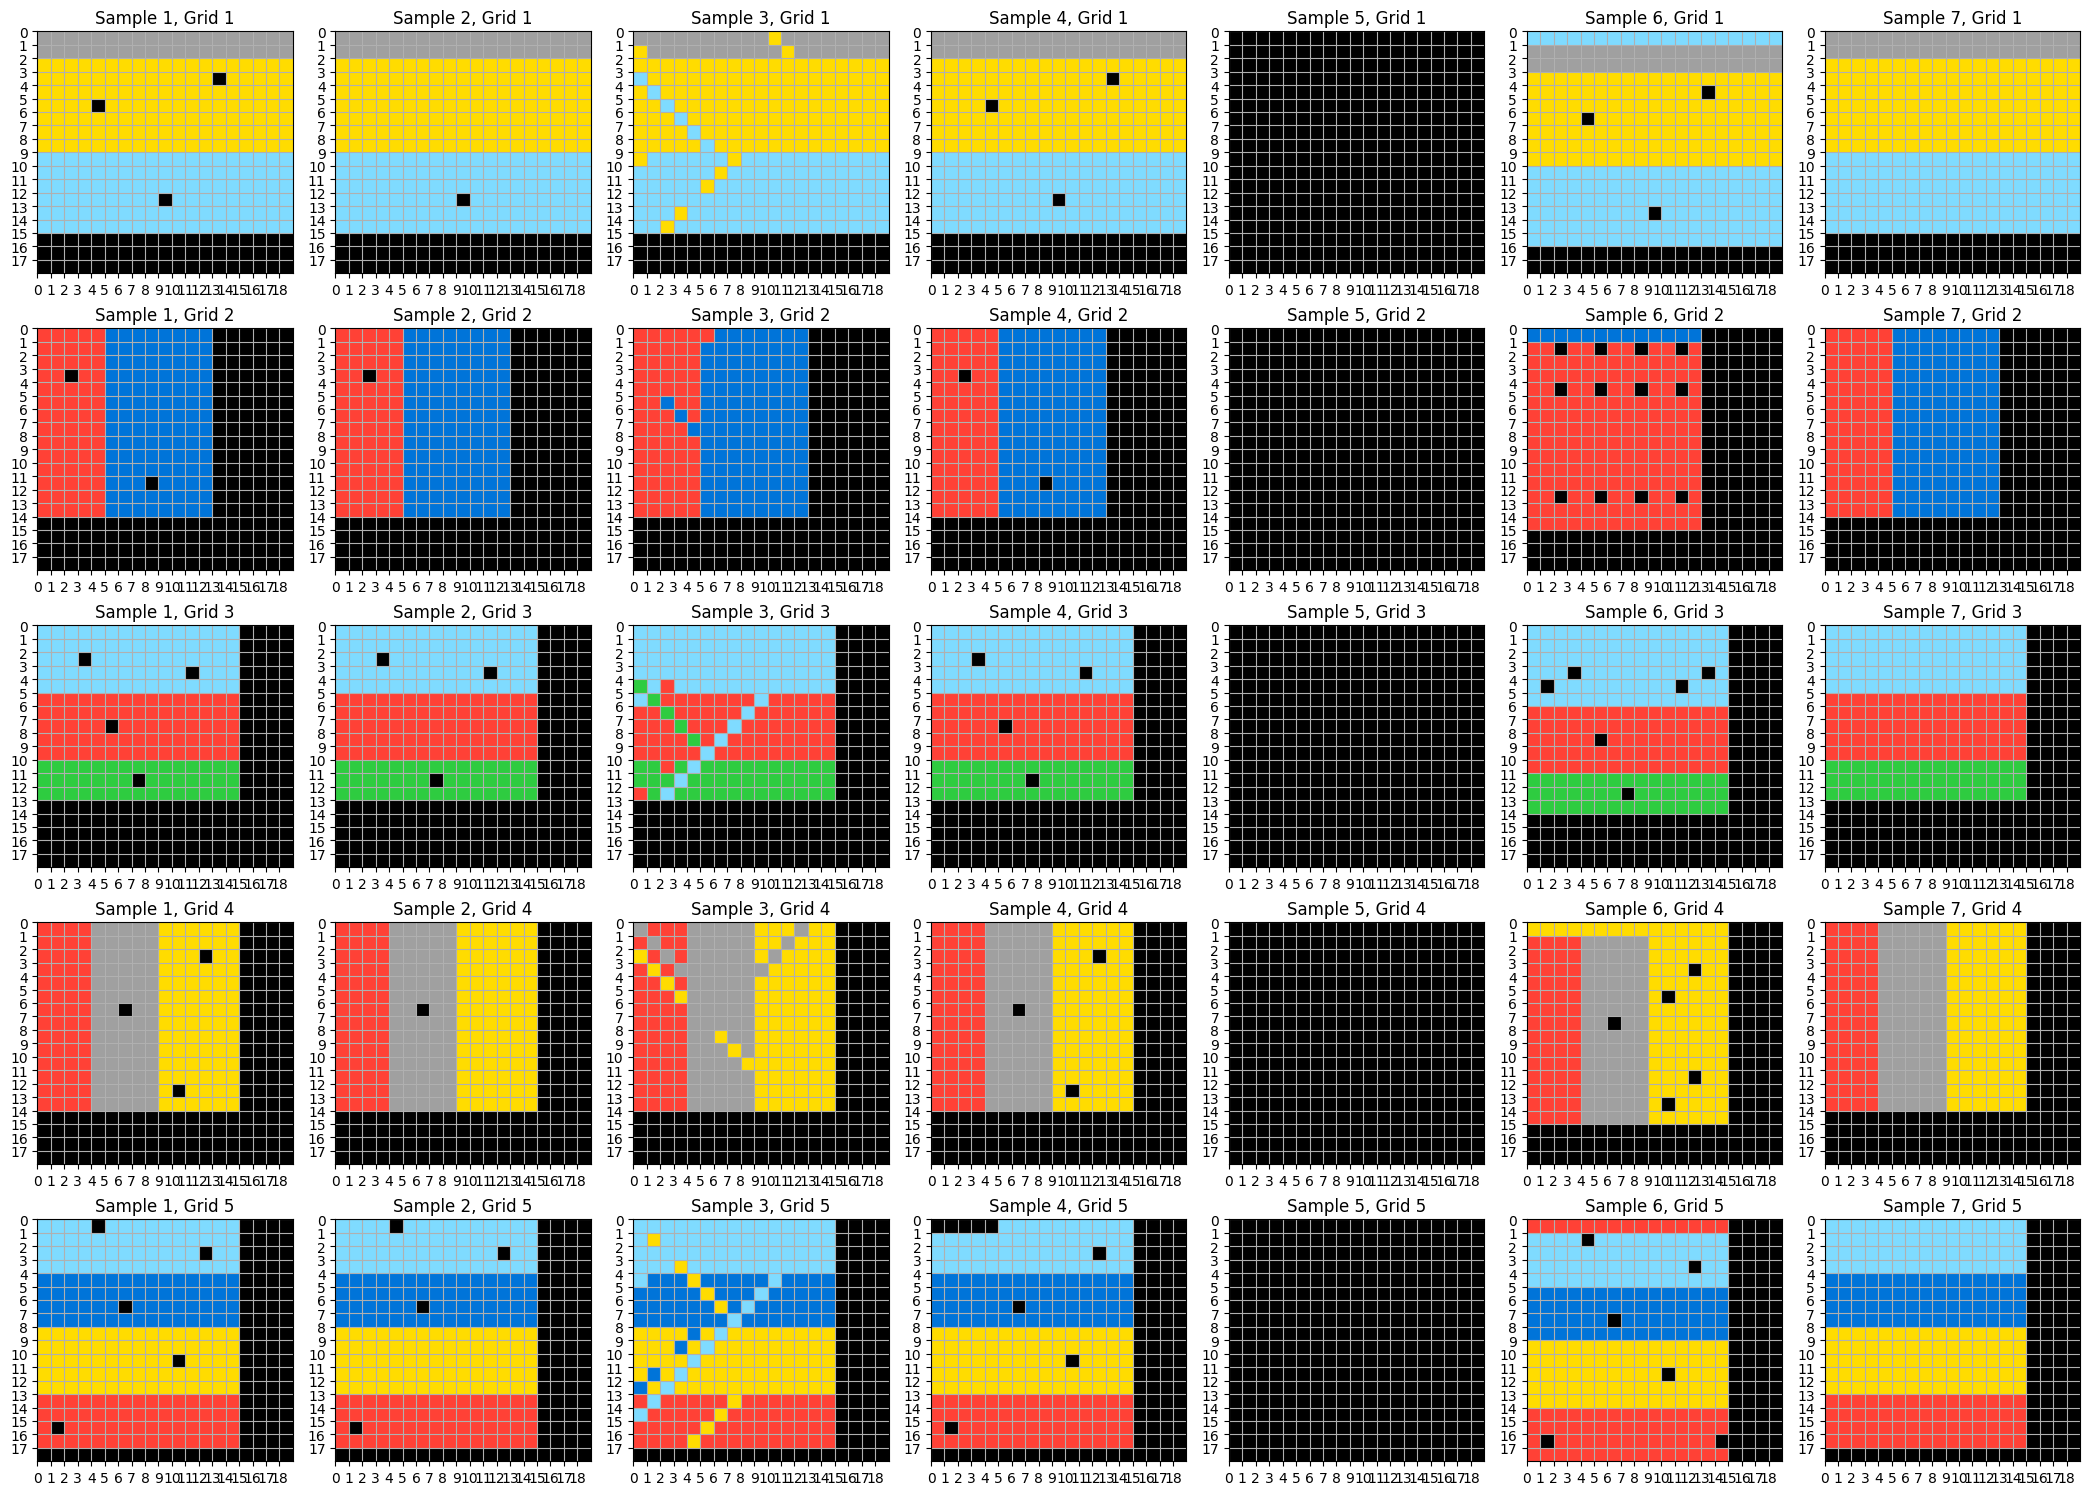

In [23]:
import random
random.seed(42)
for i, (uid, data) in enumerate(results.items()):
    if i == 0:
        continue
    succ_hypotheses = [data["responses"][i] for i, v in enumerate(data["train_verdicts"]) if v == True]
    partial_succ_hypotheses = [data["responses"][i] for i, v in enumerate(data["verdicts_per_examples"]) if True in v and v != [True]*len(v)]
    succ_grids = [data["output_grids"][i] for i, v in enumerate(data["train_verdicts"]) if v == True]
    partial_succ_grids = [data["output_grids"][i] for i, v in enumerate(data["verdicts_per_examples"]) if True in v and v != [True]*len(v)]
    
    if len(succ_hypotheses) == 0 and len(partial_succ_hypotheses) == 0:
        print(uid)
        responses = []
        output_grids = []
        for i, output_grid in enumerate(data["output_grids"]):
            if len(output_grid) > 0 and all(isinstance(row, list) and len(row) > 0 for row in output_grid):
                responses.append(data["responses"][i])
                output_grids.append(output_grid)
                if len(responses) == 7:
                    break
        print(f'\n{"-"*100}\n'.join(responses))
        visualize_predicted_grids(pad_grids(output_grids))
        break
    # print("UID\tTotal\tPartial")


3631a71a
Let's solve this puzzle using Python code with the common library functions. We'll first reason about the problem and then write the code to solve it. The `transform` function will take the input grid and return the output grid. Here is the Python code with the comments describing how to solve the problem:
```python
from common import *

import numpy as np
from typing import *

# concepts:
# reflection, symmetry, object detection

# description:
# In the input grid, you will see one large monochromatic object, and a pattern of smaller objects arranged in a circular or radial layout around it.
# The goal is to detect the large object, then mirror the surrounding patterns across the axes of symmetry of the large object. 

def transform(input_grid):
    # 1. Detect the large monochromatic object
    objects = find_connected_components(input_grid, monochromatic=True, connectivity=8, background=Color.BLACK)
    large_object = max(objects, key=lambda obj: np.sum(obj != Color.BLACK))

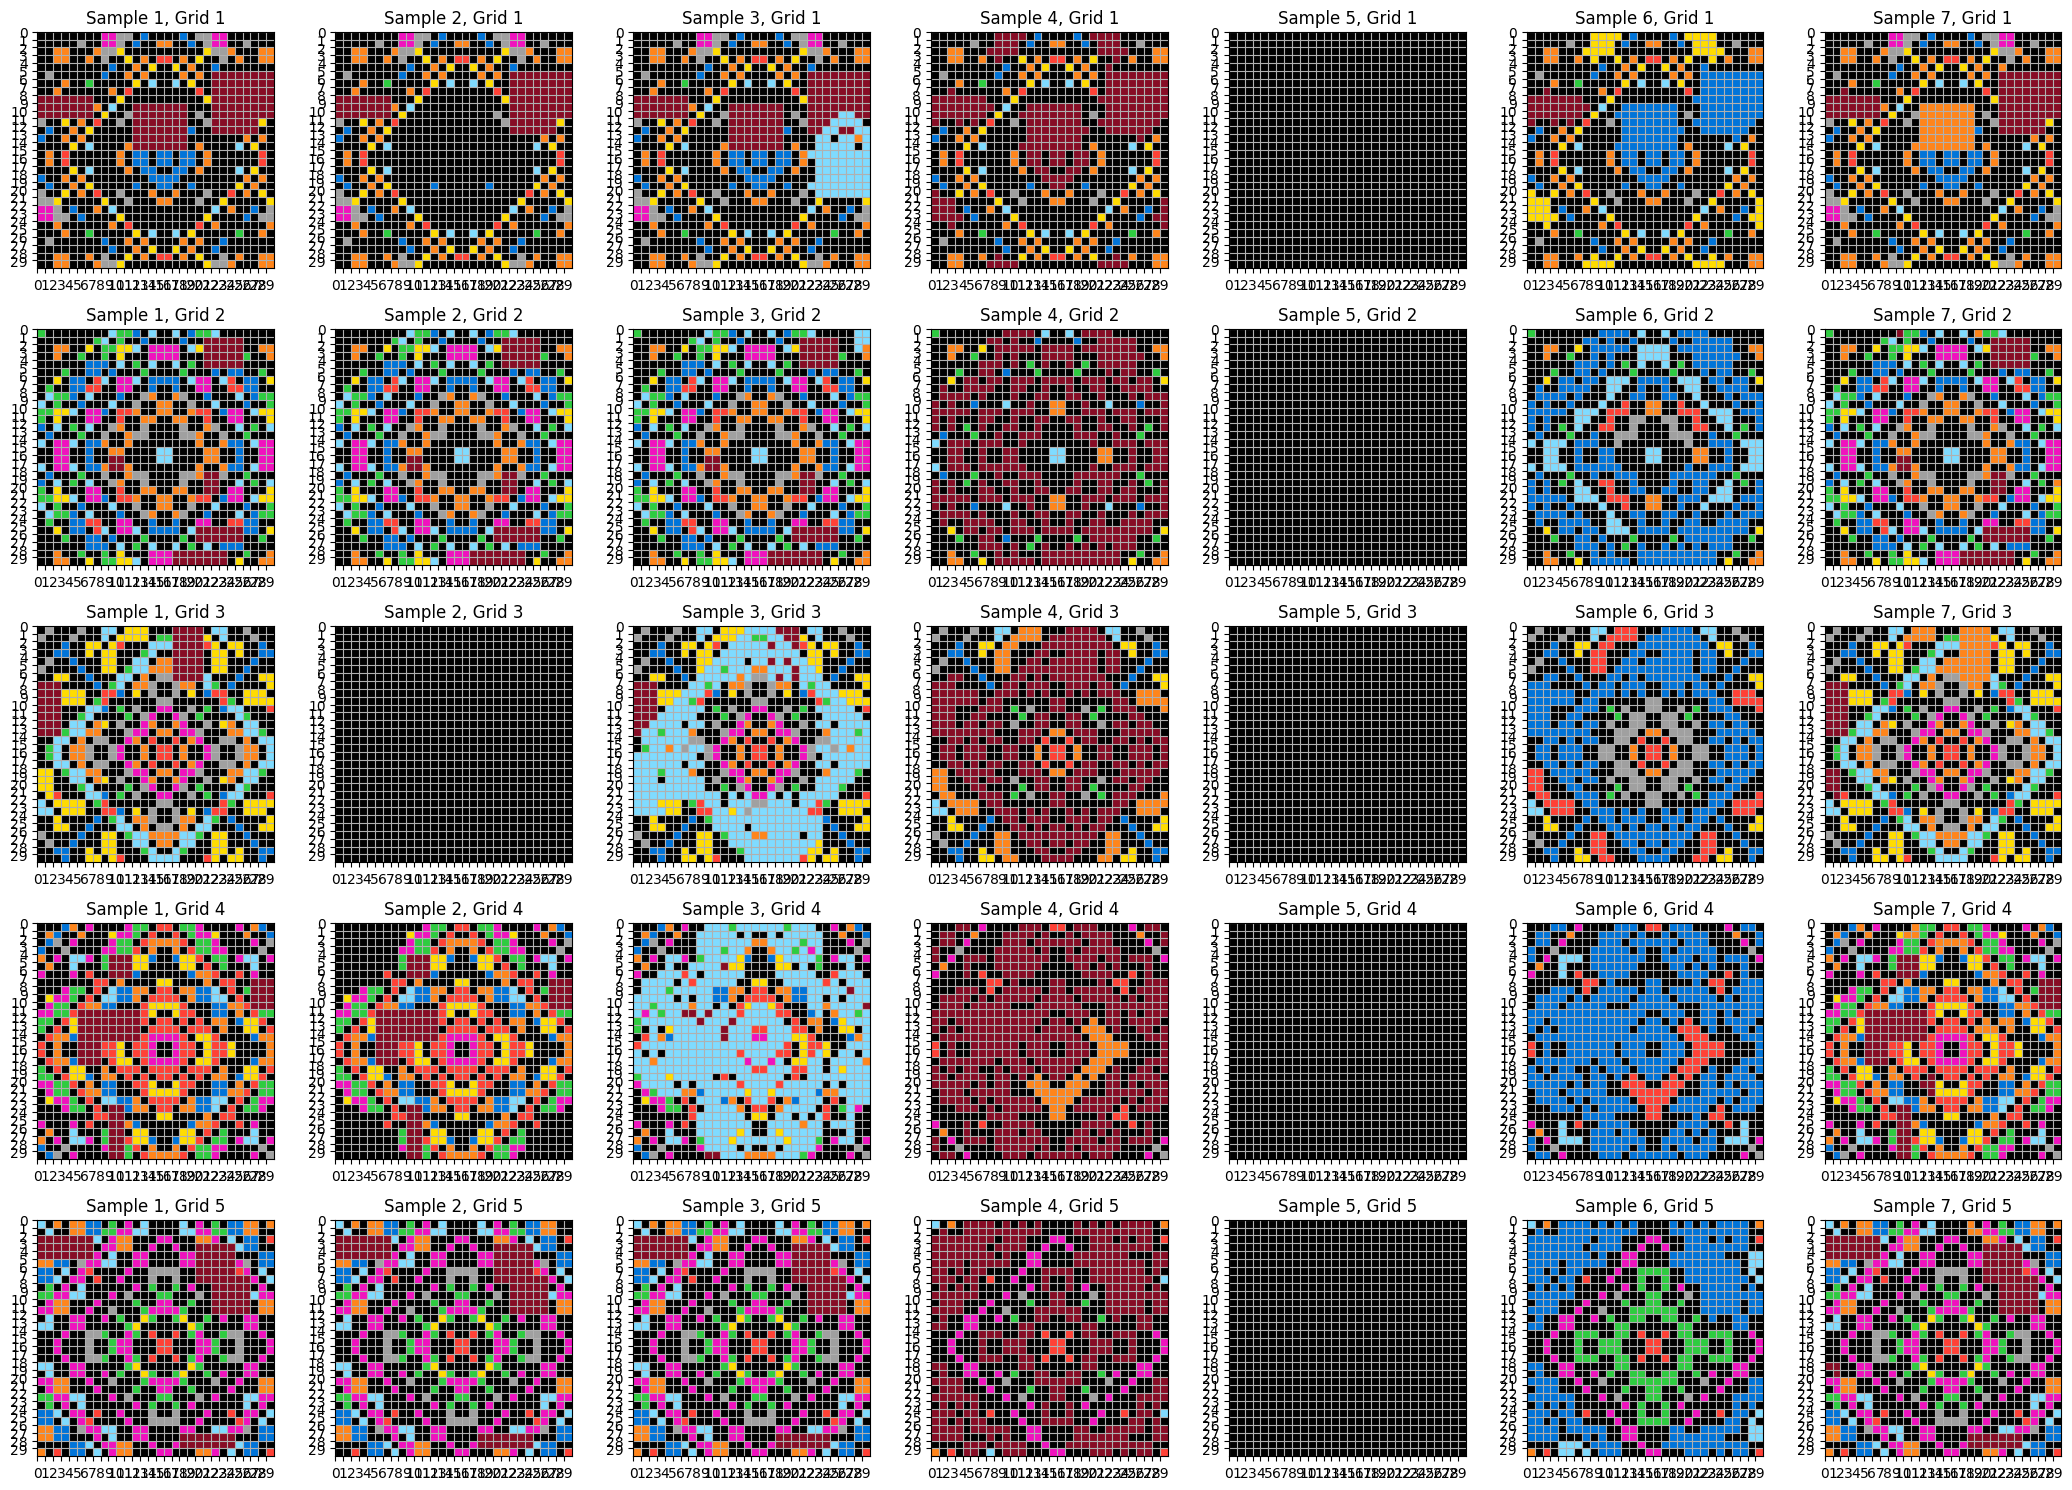

In [9]:
import random
random.seed(42)
for i, (uid, data) in enumerate(results.items()):
    succ_hypotheses = [data["responses"][i] for i, v in enumerate(data["train_verdicts"]) if v == True]
    partial_succ_hypotheses = [data["responses"][i] for i, v in enumerate(data["verdicts_per_examples"]) if True in v and v != [True]*len(v)]
    succ_grids = [data["output_grids"][i] for i, v in enumerate(data["train_verdicts"]) if v == True]
    partial_succ_grids = [data["output_grids"][i] for i, v in enumerate(data["verdicts_per_examples"]) if True in v and v != [True]*len(v)]
    
    if len(succ_hypotheses) == 0 and len(partial_succ_hypotheses) == 0:
        print(uid)
        responses = []
        output_grids = []
        for i, output_grid in enumerate(data["output_grids"]):
            if len(output_grid) > 0 and all(isinstance(row, list) and len(row) > 0 for row in output_grid):
                responses.append(data["responses"][i])
                output_grids.append(output_grid)
                if len(responses) == 7:
                    break
        print(f'\n{"-"*100}\n'.join(responses))
        visualize_predicted_grids(pad_grids(output_grids))
        break
    # print("UID\tTotal\tPartial")


## Unique code bodies

In [27]:
import re
from collections import defaultdict, Counter
from tqdm import tqdm
from time import time

# Compile the regular expression patterns outside the loop
# Modified pattern that doesn't require a return statement
# Modified pattern to handle various function signatures
transform_pattern = re.compile(
    r'def transform\([^)]*\)(?:\s*->\s*[^:]+)?:\n'  # More permissive function signature
    r'((?:\s+[^\n]*\n)*)',  # Capture any indented lines
    re.MULTILINE
)
code_block_pattern = re.compile(r'```python\n(.*?)```', re.DOTALL)
comment_pattern = re.compile(r'#.*')

def extract_transform_body(text):
    code_match = code_block_pattern.search(text)
    if code_match:
        code = code_match.group(1)
        transform_match = transform_pattern.search(code)
        if transform_match:
            body = transform_match.group(1)
            return body.rstrip()
    else:
        print("No code block found")
    return None

unique_bodies = defaultdict(dict)

for i, (uid, data) in tqdm(enumerate(results.items()), total=len(results)):
    hypotheses = data["responses"]
    verdicts = data["verdicts_per_examples"]
    for j, (hypothesis, verdict) in enumerate(zip(hypotheses, verdicts)):
        match = extract_transform_body(hypothesis)
        if match:
            body = comment_pattern.sub('', match)
            body = re.sub(r'\s+', ' ', body).strip()
            if uid not in unique_bodies or body not in unique_bodies[uid]:
                unique_bodies[uid][body] = {"freq": 1, "verdicts": verdict}
            else:
                unique_bodies[uid][body]["freq"] += 1
        else:
            print(repr(hypothesis))
            print("Length:", len(hypothesis))
            print("First few characters:", hypothesis[:50].encode('unicode_escape'))

  0%|          | 0/400 [00:00<?, ?it/s]

100%|██████████| 400/400 [00:02<00:00, 179.09it/s]


In [29]:
for uid, stats in unique_bodies.items():
    print(uid)
    sorted_stats = {k: v for k, v in sorted(stats.items(), key=lambda item: item[1]["freq"], reverse=True)}
    assert sum([stat["freq"] for stat in sorted_stats.values()]) == len(results[uid]["responses"])
    for body, stat in sorted_stats.items():
        print(f"{stat['freq']}\t{body[:30]}\t{stat['verdicts']}")  # Limit the length of k to 30 characters


3631a71a
1	occlusion_color = Color.BROWN 	[None, None, None, None, None]
1	brown_outline = np.zeros_like(	[False, False, False, False, False]
1	output_grid = np.copy(input_gr	[False, False, False, False, False]
1	output_grid = np.copy(input_gr	[False, False, False, False, False]
1	output_grid = np.copy(input_gr	[False, False, False, False, False]
1	output_grid = np.copy(input_gr	[False, False, False, False, False]
1	output_grid = np.copy(input_gr	[None, None, None, None, None]
1	identified_cells = detect_obje	[None, None, None, None, None]
1	output_grid = np.copy(input_gr	[False, False, False, False, False]
1	brown_square = np.where(input_	[False, False, False, False, False]
1	background = Color.BLACK centr	[False, False, False, False, False]
1	background = Color.BLACK objec	[None, None, None, None, None]
1	center_x, center_y = input_gri	[False, False, False, False, False]
1	components = find_connected_co	[False, False, False, False, False]
1	divider_color = None for i in 	[False, Fals

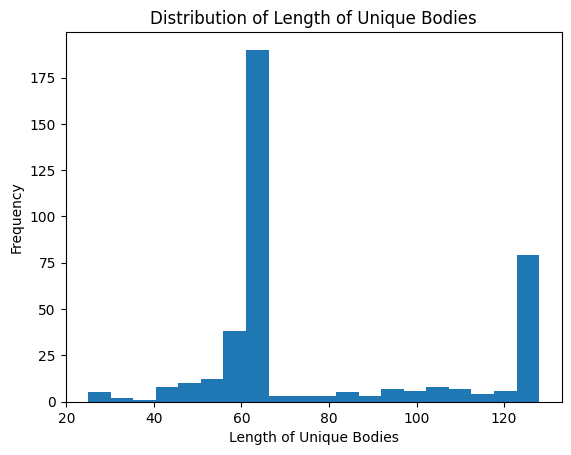

In [39]:
import matplotlib.pyplot as plt

# Get the lengths of unique bodies
lengths = [len(body) for body in unique_bodies.values()]

# Create a histogram
plt.hist(lengths, bins=20)

# Set labels and title
plt.xlabel('Length of Unique Bodies')
plt.ylabel('Frequency')
plt.title('Distribution of Length of Unique Bodies')

# Show the plot
plt.show()


# Partial Ordering

# Imitation learning: output gold action

In [2]:
global input_grids, output_grids

def verify_transformation(source_code: str) -> str:
    """
    Verifies if a given Python implementation correctly transforms input grids to output grids.
    The input/output grids for all train (reference) and test examples are retrieved internally.
    
    Args:
        source_code: Python source code containing the transform() function implementation
        
    Returns:
        A string describing whether the implementation was successful for each input grid
    """
    # Get the current problem's input/output grids from the global context
    if 'input_grids' not in globals() or 'output_grids' not in globals():
        return "Error: No problem context available"
        
    return _verify_transformation(input_grids, output_grids, source_code)

def _verify_transformation(input_grids, output_grids, source_code):
    pass

str(verify_transformation)

'<function verify_transformation at 0x7f5bea5ec3a0>'

In [3]:
import inspect
inspect.getsource(verify_transformation)

'def verify_transformation(source_code: str) -> str:\n    """\n    Verifies if a given Python implementation correctly transforms input grids to output grids.\n    The input/output grids for all train (reference) and test examples are retrieved internally.\n    \n    Args:\n        source_code: Python source code containing the transform() function implementation\n        \n    Returns:\n        A string describing whether the implementation was successful for each input grid\n    """\n    # Get the current problem\'s input/output grids from the global context\n    if \'input_grids\' not in globals() or \'output_grids\' not in globals():\n        return "Error: No problem context available"\n        \n    return _verify_transformation(input_grids, output_grids, source_code)\n'

In [4]:
import numpy as np

np.ndarray([1,2,3])

array([[[6.91855362e-310, 6.91855362e-310, 4.01378312e-297],
        [1.01971356e+060, 1.27227932e+026, 1.23323232e+084]]])

In [5]:
print("from common import *\n\nimport numpy as np\nfrom typing import *\n\n# concepts:\n# topology, boundary detection, color filling\n\n# description:\n# The input grid contains a series of colored pixels (red, blue, green) surrounded by black pixels. \n# To produce the output, you need to color the interior of each enclosed region formed by these colored pixels with a new color (purple).\n# The boundaries of the enclosed regions are defined by the colored pixels themselves.\n\ndef transform(input_grid):\n    # Create an output grid based on the input grid\n    output_grid = input_grid.copy()\n\n    # Find the boundaries of the colored objects\n    boundary_mask = object_boundary(input_grid)\n    \n    # Identify the interior of the colored regions\n    interior_mask = object_interior(input_grid)\n    \n    # Color the interior regions that are not on the boundary\n    for x, y in np.argwhere(interior_mask & ~boundary_mask):\n        output_grid[x, y] = Color.PURPLE\n\n    return output_grid")

from common import *

import numpy as np
from typing import *

# concepts:
# topology, boundary detection, color filling

# description:
# The input grid contains a series of colored pixels (red, blue, green) surrounded by black pixels. 
# To produce the output, you need to color the interior of each enclosed region formed by these colored pixels with a new color (purple).
# The boundaries of the enclosed regions are defined by the colored pixels themselves.

def transform(input_grid):
    # Create an output grid based on the input grid
    output_grid = input_grid.copy()

    # Find the boundaries of the colored objects
    boundary_mask = object_boundary(input_grid)
    
    # Identify the interior of the colored regions
    interior_mask = object_interior(input_grid)
    
    # Color the interior regions that are not on the boundary
    for x, y in np.argwhere(interior_mask & ~boundary_mask):
        output_grid[x, y] = Color.PURPLE

    return output_grid


In [1]:
from arc import train_problems

for problem in train_problems:
    if problem.uid == "4938f0c2":
        input_grid = problem.train_pairs[0].x
        output_grid = problem.train_pairs[0].y
        break

print(input_grid)
print(output_grid)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [3]:
source = "from common import *\n\nimport numpy as np\nfrom typing import *\n\n# concepts:\n# symmetry, reflection, color transformation\n\n# description:\n# In the input you will see a small monochromatic pattern with reflectional symmetry (horizontal and vertical),\n# as well as another colored object in the center. To make the output, reflect the colored object across \n# the axes of reflectional symmetry of the small pattern.\n\ndef transform(input_grid):\n    # 1. Detect the symmetric pattern and the colored object\n    objects = find_connected_components(input_grid, connectivity=8, background=Color.BLACK)\n    assert len(objects) == 2, \"There should be exactly two objects: the symmetric pattern and the colored object.\"\n\n    symmetric_object = None\n    colored_object = None\n\n    # Identify which object is symmetric\n    for obj in objects:\n        symmetries = detect_mirror_symmetry(obj, ignore_colors=[], background=Color.BLACK)\n        if len(symmetries) >= 2:  # We need at least horizontal and vertical symmetry\n            symmetric_object = obj\n        else:\n            colored_object = obj\n\n    assert symmetric_object is not None and colored_object is not None, \"One object should be symmetric and the other should be colored.\"\n\n    # 2. Create the output grid\n    output_grid = input_grid.copy()\n\n    # Reflect the colored object across the axes of symmetry of the symmetric pattern\n    for x, y in np.argwhere(colored_object != Color.BLACK):\n        original_color = colored_object[x, y]\n        for transformed_x, transformed_y in orbit(output_grid, x, y, symmetries=symmetries):\n            output_grid[transformed_x, transformed_y] = original_color\n    \n    return output_grid"
print(source)

from common import *

import numpy as np
from typing import *

# concepts:
# symmetry, reflection, color transformation

# description:
# In the input you will see a small monochromatic pattern with reflectional symmetry (horizontal and vertical),
# as well as another colored object in the center. To make the output, reflect the colored object across 
# the axes of reflectional symmetry of the small pattern.

def transform(input_grid):
    # 1. Detect the symmetric pattern and the colored object
    objects = find_connected_components(input_grid, connectivity=8, background=Color.BLACK)
    assert len(objects) == 2, "There should be exactly two objects: the symmetric pattern and the colored object."

    symmetric_object = None
    colored_object = None

    # Identify which object is symmetric
    for obj in objects:
        symmetries = detect_mirror_symmetry(obj, ignore_colors=[], background=Color.BLACK)
        if len(symmetries) >= 2:  # We need at least horizontal and vertical sym

In [2]:
import json

with open("../results/arc_train_240/arc_problems_train_240_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1111110600563620_timeout-10_exec_results_v4.jsonl") as f:
    for i, line in enumerate(f):
        d = json.loads(line)
        if d["uid"] == "4938f0c2":
            print(i+1)
            break


96


In [5]:
# Get the directory of the current script
from typing import List
import os


# Use os.path.join to create path relative to script location
with open("/mnt/nas/suehyun/BARC/finetune/alignment-handbook/common.py", "r") as f:
    COMMON_LIBRARY_CODE = f.read()
    
def verify_transformation(source_code: str, input_grids: List[List[List[int]]] = None, output_grids: List[List[List[int]]] = None) -> str:
    """
    Verifies if a given Python implementation correctly transforms input grids to output grids.
    If input/output grids are not provided, retrieves them from the global context.
    
    Args:
        source_code: Python source code containing the transform() function implementation
        input_grids: List of 2D grids representing train/test inputs; provided by the system
        output_grids: List of 2D grids representing expected outputs; provided by the system
        
    Returns:
        A string describing whether the implementation was successful for each input grid
    """
    if input_grids is None or output_grids is None:
        return "Error: No problem context available"
        
    return _verify_transformation(input_grids, output_grids, source_code)


def compare_grids(output_grid, expected_grid):
    if isinstance(output_grid, str):
        return None
        
    if not isinstance(output_grid, np.ndarray):  # type mismatch
        return None
        
    if len(output_grid.shape) != 2:  # non-2d array
        return None
        
    if np.array_equal(output_grid, expected_grid):
        return True
    
    if output_grid.shape != expected_grid.shape:  # shape mismatch
        return False
        
    # If shapes match but content doesn't
    return False


def execute_transform(input_grid, expected_grid, source_code):
    import numpy as np
    import random
    
    # Create execution environment with necessary imports and setup
    exec_globals = {
        'np': np,
        'random': random,
        'input_grid': input_grid
    }
    
    # Set random seeds for reproducibility
    random.seed(0)
    np.random.seed(0)
    
    # Add any common library code if needed
    if 'COMMON_LIBRARY_CODE' in globals():
        exec(COMMON_LIBRARY_CODE, exec_globals)
    
    # Execute the source code
    exec(source_code, exec_globals)
    
    # Get the transformed output
    if 'transform' not in exec_globals:
        return None
        
    output = exec_globals['transform'](input_grid)
    return compare_grids(output, expected_grid)


def _verify_transformation(input_grids: List[List[List[int]]], output_grids: List[List[List[int]]], source_code: str) -> str:
    """
    Internal implementation of the verification logic with timeout handling.
    """
    import numpy as np
    from pebble import ProcessPool, ProcessExpired
    from concurrent.futures import TimeoutError
    
    # Convert all grids to numpy arrays
    input_grids = [np.array(grid) for grid in input_grids]
    output_grids = [np.array(grid) for grid in output_grids]
    
    results = []
    TIMEOUT = 8

    for input_grid, expected_grid in zip(input_grids, output_grids):
        try:
            with ProcessPool(max_workers=8) as pool:
                future = pool.schedule(execute_transform, 
                                    args=(input_grid, expected_grid, source_code),
                                    timeout=TIMEOUT)
                result = future.result()
                results.append(result)
        except TimeoutError:
            results.append("timeout")
        except ProcessExpired as error:
            results.append("process_expired")
        except Exception as error:
            results.append(None)
    
    return format_verification_results(results)


def format_verification_results(verdicts: List[bool]) -> str:
    """
    Formats the verification results into a string.
    """
    result_messages = ["Result of the transform() function for every case in the reference and test examples:"]
    for i, result in enumerate(verdicts, 1):
        if result is True:
            result_messages.append(f"Case {i}: Correct output")
        elif result is False:
            result_messages.append(f"Case {i}: Incorrect output")
        else:  # result is None
            result_messages.append(f"Case {i}: Error during execution")
    return "\n".join(result_messages)

In [7]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B-Instruct")
messages = [
    {
      "role": "system",
      "content": "You are a world-class puzzle solver with exceptional pattern recognition skills and expertise in Python programming. Your task is to analyze puzzles and provide Python solutions."
    },
    {
      "role": "user",
      "content": "Given input-output grid pairs as reference examples, carefully observe the patterns to predict the output grid for new test input. Each pair follows the same transformation rule. Grids are 2D arrays represented as strings, with cells (colors) separated by spaces and rows by newlines.\nHere are the input and output grids for the reference examples:\nExample 1\nInput:\nPurple Blue Red Blue Yellow\nYellow Yellow Red Yellow Purple\nGreen Orange Red Yellow Purple\nRed Orange Orange Purple Orange\nPurple Orange Orange Yellow Purple\n\nOutput:\nPurple Orange Orange Yellow Purple\nRed Orange Orange Purple Orange\nGreen Orange Red Yellow Purple\nYellow Yellow Red Yellow Purple\nPurple Blue Red Blue Yellow\n\n\nExample 2\nInput:\nOrange Green Green Blue Red\nBlue Purple Red Yellow Blue\nRed Orange Purple Orange Red\nOrange Orange Yellow Blue Purple\nPurple Blue Orange Orange Blue\n\nOutput:\nPurple Blue Orange Orange Blue\nOrange Orange Yellow Blue Purple\nRed Orange Purple Orange Red\nBlue Purple Red Yellow Blue\nOrange Green Green Blue Red\n\n\nExample 3\nInput:\nRed Orange Yellow Green Yellow Purple Green\nRed Green Orange Blue Red Green Green\nPurple Orange Yellow Green Red Red Yellow\nBlue Blue Red Blue Yellow Yellow Orange\nRed Yellow Green Blue Blue Yellow Blue\nYellow Purple Orange Yellow Yellow Purple Red\nOrange Green Purple Yellow Green Red Purple\n\nOutput:\nOrange Green Purple Yellow Green Red Purple\nYellow Purple Orange Yellow Yellow Purple Red\nRed Yellow Green Blue Blue Yellow Blue\nBlue Blue Red Blue Yellow Yellow Orange\nPurple Orange Yellow Green Red Red Yellow\nRed Green Orange Blue Red Green Green\nRed Orange Yellow Green Yellow Purple Green\n\n\nHere is (are) the input grid(s) for the test example(s):\nInput(s):\nRed Purple Blue Green Red Yellow Blue\nYellow Yellow Blue Blue Yellow Green Yellow\nBlue Blue Blue Blue Yellow Orange Green\nBlue Blue Red Green Purple Blue Green\nYellow Blue Blue Blue Orange Purple Yellow\nGreen Red Purple Yellow Blue Purple Yellow\nBlue Yellow Orange Blue Red Green Yellow\n\nWrite a Python function `transform` that can convert any given input grid to its corresponding output grid based on the pattern observed in the reference examples."
    },
    {
      "role": "assistant",
      "content": "from common import *\n\nimport numpy as np\nfrom typing import *\n\n# concepts:\n# color mapping, reflection, symmetry\n\n# description:\n# In the input you will see a grid with different colored pixels. \n# To make the output, reflect the grid horizontally and change each color according to the following mapping:\n# red -> red, green -> green, blue -> blue, yellow -> yellow, purple -> purple, orange -> orange\n\ndef transform(input_grid):\n    # Initialize output grid\n    output_grid = np.copy(input_grid)\n\n    # Reflect the grid horizontally\n    output_grid = np.flip(output_grid, axis=1)\n\n    # Perform color mapping\n    color_map = {\n        Color.RED: Color.RED,\n        Color.GREEN: Color.GREEN,\n        Color.BLUE: Color.BLUE,\n        Color.YELLOW: Color.YELLOW,\n        Color.PURPLE: Color.PURPLE,\n        Color.ORANGE: Color.ORANGE\n    }\n    \n    output_grid = np.vectorize(lambda color: color_map.get(color, color))(output_grid)\n\n    return output_grid"
    },
    {
      "role": "assistant",
      "tool_calls": [
        {
          "type": "function",
          "function": {
            "name": "verify_transformation",
            "arguments": {
              "source_code": "from common import *\n\nimport numpy as np\nfrom typing import *\n\n# concepts:\n# color mapping, reflection, symmetry\n\n# description:\n# In the input you will see a grid with different colored pixels. \n# To make the output, reflect the grid horizontally and change each color according to the following mapping:\n# red -> red, green -> green, blue -> blue, yellow -> yellow, purple -> purple, orange -> orange\n\ndef transform(input_grid):\n    # Initialize output grid\n    output_grid = np.copy(input_grid)\n\n    # Reflect the grid horizontally\n    output_grid = np.flip(output_grid, axis=1)\n\n    # Perform color mapping\n    color_map = {\n        Color.RED: Color.RED,\n        Color.GREEN: Color.GREEN,\n        Color.BLUE: Color.BLUE,\n        Color.YELLOW: Color.YELLOW,\n        Color.PURPLE: Color.PURPLE,\n        Color.ORANGE: Color.ORANGE\n    }\n    \n    output_grid = np.vectorize(lambda color: color_map.get(color, color))(output_grid)\n\n    return output_grid"
            }
          }
        }
      ]
    },
    {
      "role": "tool",
      "name": "verify_transformation",
      "content": "Result of the transform() function for every case in the reference and test examples:\nCase 1: Incorrect output\nCase 2: Incorrect output\nCase 3: Incorrect output\nCase 4: Incorrect output"
    },
    {
      "role": "assistant",
      "content": "from common import *\n\nimport numpy as np\nfrom typing import *\n\n# concepts:\n# pattern reversal, color correspondence\n\n# description:\n# In the input you will see a grid with a pattern of colored pixels.\n# To make the output, reverse the pattern and change the colors according to the following mapping:\n# red -> red, blue -> blue, green -> green, yellow -> yellow, purple -> purple, orange -> orange.\n\ndef transform(input_grid):\n    # Initialize output grid\n    output_grid = np.copy(input_grid)\n\n    # Reverse the grid vertically\n    output_grid = np.flipud(output_grid)\n\n    # Define color mapping\n    color_map = {\n        Color.RED: Color.RED,\n        Color.BLUE: Color.BLUE,\n        Color.GREEN: Color.GREEN,\n        Color.YELLOW: Color.YELLOW,\n        Color.PURPLE: Color.PURPLE,\n        Color.ORANGE: Color.ORANGE\n    }\n\n    # Apply color mapping\n    output_grid = np.vectorize(lambda color: color_map.get(color, color))(output_grid)\n\n    return output_grid"
    },
    {
      "role": "assistant",
      "tool_calls": [
        {
          "type": "function",
          "function": {
            "name": "verify_transformation",
            "arguments": {
              "source_code": "from common import *\n\nimport numpy as np\nfrom typing import *\n\n# concepts:\n# pattern reversal, color correspondence\n\n# description:\n# In the input you will see a grid with a pattern of colored pixels.\n# To make the output, reverse the pattern and change the colors according to the following mapping:\n# red -> red, blue -> blue, green -> green, yellow -> yellow, purple -> purple, orange -> orange.\n\ndef transform(input_grid):\n    # Initialize output grid\n    output_grid = np.copy(input_grid)\n\n    # Reverse the grid vertically\n    output_grid = np.flipud(output_grid)\n\n    # Define color mapping\n    color_map = {\n        Color.RED: Color.RED,\n        Color.BLUE: Color.BLUE,\n        Color.GREEN: Color.GREEN,\n        Color.YELLOW: Color.YELLOW,\n        Color.PURPLE: Color.PURPLE,\n        Color.ORANGE: Color.ORANGE\n    }\n\n    # Apply color mapping\n    output_grid = np.vectorize(lambda color: color_map.get(color, color))(output_grid)\n\n    return output_grid"
            }
          }
        }
      ]
    },
    {
      "role": "tool",
      "name": "verify_transformation",
      "content": "Result of the transform() function for every case in the reference and test examples:\nCase 1: Correct output\nCase 2: Correct output\nCase 3: Correct output\nCase 4: Correct output"
    }
  ]

output = tokenizer.apply_chat_template(messages, tools=[verify_transformation], tokenize=False)
print(output)

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Environment: ipython
Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

You are a world-class puzzle solver with exceptional pattern recognition skills and expertise in Python programming. Your task is to analyze puzzles and provide Python solutions.<|eot_id|><|start_header_id|>user<|end_header_id|>

Given the following functions, please respond with a JSON for a function call with its proper arguments that best answers the given prompt.

Respond in the format {"name": function name, "parameters": dictionary of argument name and its value}.Do not use variables.

{
    "type": "function",
    "function": {
        "name": "verify_transformation",
        "description": "Verifies if a given Python implementation correctly transforms input grids to output grids.\nIf input/output grids are not provided, retrieves them from the global context.",
        "parameters": {
            "type": "object",
            "propert

In [13]:
import json
token_counts = []
for msg in messages:
    if "content" in msg:
        token_count= len(tokenizer.encode(msg["content"]))
    elif "tool_calls" in msg:
        token_count += len(tokenizer.encode(json.dumps(msg["tool_calls"])))
    else:
        raise ValueError(f"Unknown message type: {msg}")
    token_counts.append(token_count)
print(token_counts)
print(sum(token_counts))
print(sum(token_counts) / len(token_counts))
print(max(token_counts))

[30, 429, 214, 482, 44, 215, 484, 44]
1942
242.75
484
